In [1]:
# Helpful Python packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./HAR-data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./HAR-data/.DS_Store
./HAR-data/reference/.DS_Store
./HAR-data/reference/BRJ-2022-12-1908.05.06-upstairs.csv
./HAR-data/reference/BRJ-2022-12-1908.09.53-walking-standing-walking-onTable.csv
./HAR-data/reference/BRJ-2022-12-1908.02.39-standing.csv
./HAR-data/reference/BRJ-2022-12-1908.03.34-walking.csv
./HAR-data/reference/BRJ-2022-12-1908.04.30-downstairs.csv
./HAR-data/reference/BRJ-2022-12-1908.05.35-walkingWithCurves.csv


In [2]:
# Select a file for the case you want to analyze
dataset = pd.read_csv("HAR-data/reference/BRJ-2022-12-1908.09.53-walking-standing-walking-onTable.csv", delimiter=";", decimal=",")
dataset.describe()

,time,gFx,gFy,gFz,TgF
count,10192.000000,10192.000000,10192.00000,10192.000000,10192.000000
mean,25.603063,0.047193,0.09836,1.009100,1.024110
std,14.791738,0.089314,0.09621,0.198297,0.194778
min,0.003615,-0.509900,-0.35600,-1.323200,0.006000
25%,12.792996,0.005900,0.01290,0.895900,0.914000
50%,25.606068,0.032200,0.10330,1.015300,1.017000
75%,38.410509,0.095000,0.16690,1.090300,1.106000
max,51.216879,1.766100,0.45510,5.828700,6.101000


In [3]:
# Duration of acceleration record
duration = dataset['time'][dataset.index[-1]]
# Acquisition frequency
fs = dataset[ (dataset['time']>0) & (dataset['time']<1) ]['TgF'].count()
# Interval between consecutive points (milliseconds)
interval = (1/fs) * 1000
print("%.1f seconds serie, interval between consecutive points = %.1f milliseconds" % (duration, interval) )

51.2 seconds serie, interval between consecutive points = 5.0 milliseconds


In [4]:
# Set index of dataframe to be 'timestamp' column
dataset.set_index('time', inplace = True)
dataset.head()

,gFx,gFy,gFz,TgF
time,,,,
0.003615,0.0657,0.1285,1.0219,1.032
0.004199,0.0674,0.1275,1.0024,1.013
0.004558,0.0694,0.1287,0.9841,0.995
0.004795,0.0674,0.1309,0.9660,0.977
0.007641,0.0667,0.1361,0.9491,0.961


# Exploratory Data Analysis
## Time series of vibration data
Let's follow the tutorial https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [5]:
# Select a subset of the vibration records
time_serie = dataset #['TgF']

## Graphics of temporal evolution: all in one graph
The next plots show the time series of the 4 accelerometers placed in the gearbox

In [6]:
# Import Python libraries for graphical representations
import matplotlib.pyplot as plt
from pylab import rcParams

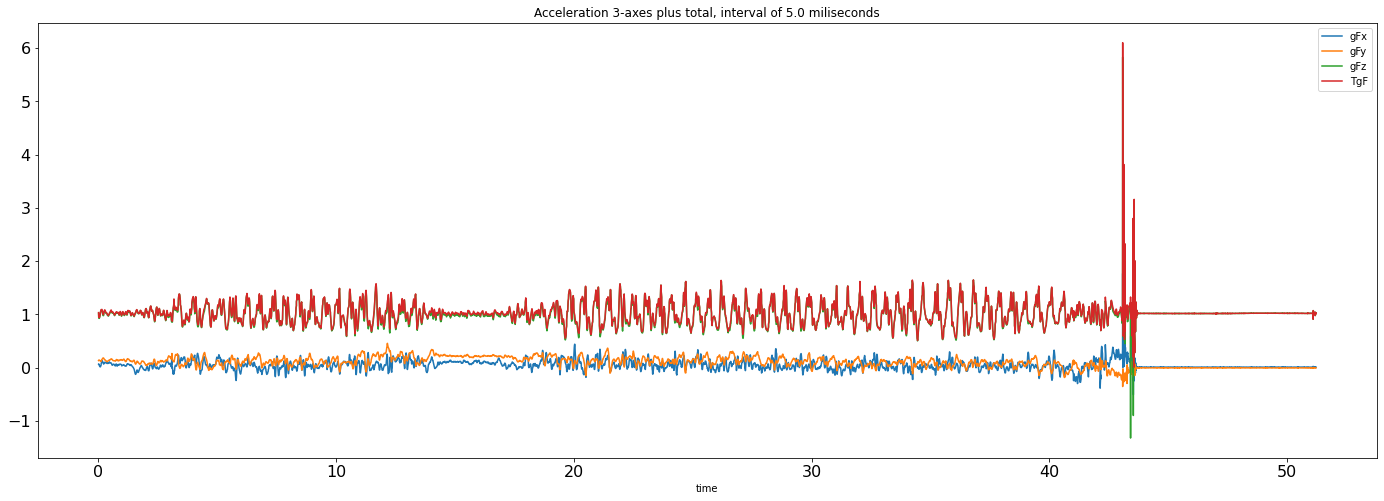

In [7]:
rcParams['figure.figsize'] = 24, 8
time_serie.plot(title="Acceleration 3-axes plus total, interval of %.1f miliseconds" %interval, fontsize=16)
plt.show()

## Histogram of the four vibration signals
Each plot shows the histogram for each of the 4 accelerations a1, a2, a3, a4

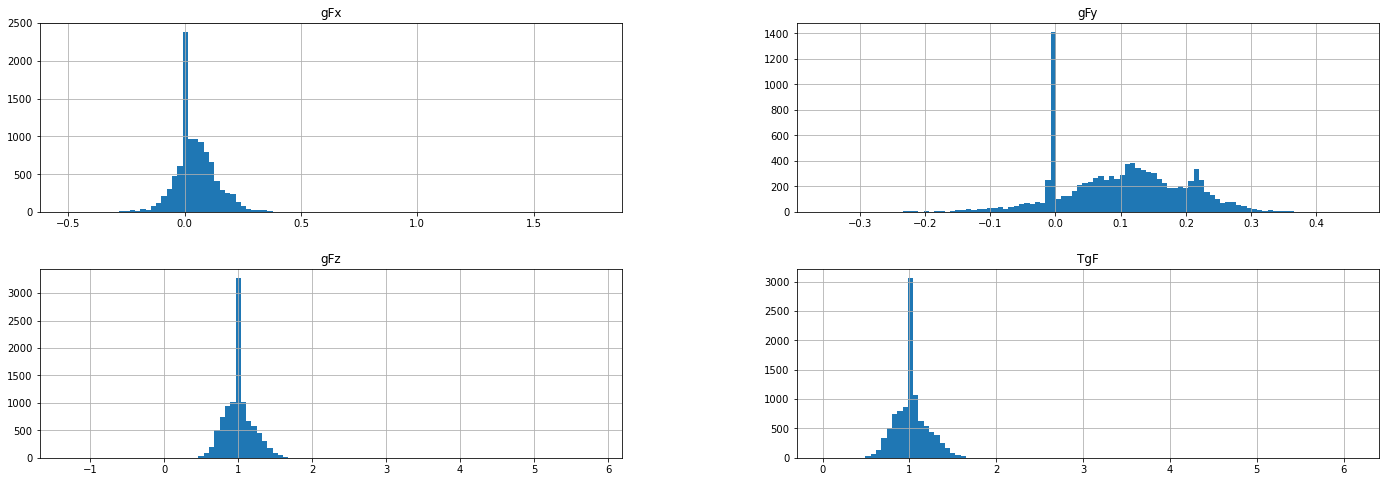

In [8]:
time_serie.hist(bins=100)
plt.show()

## Plots of probability density functions of vibration signals
KDE Plot described as *Kernel Density Estimate* is used for visualizing the Probability Density of a continuous variable

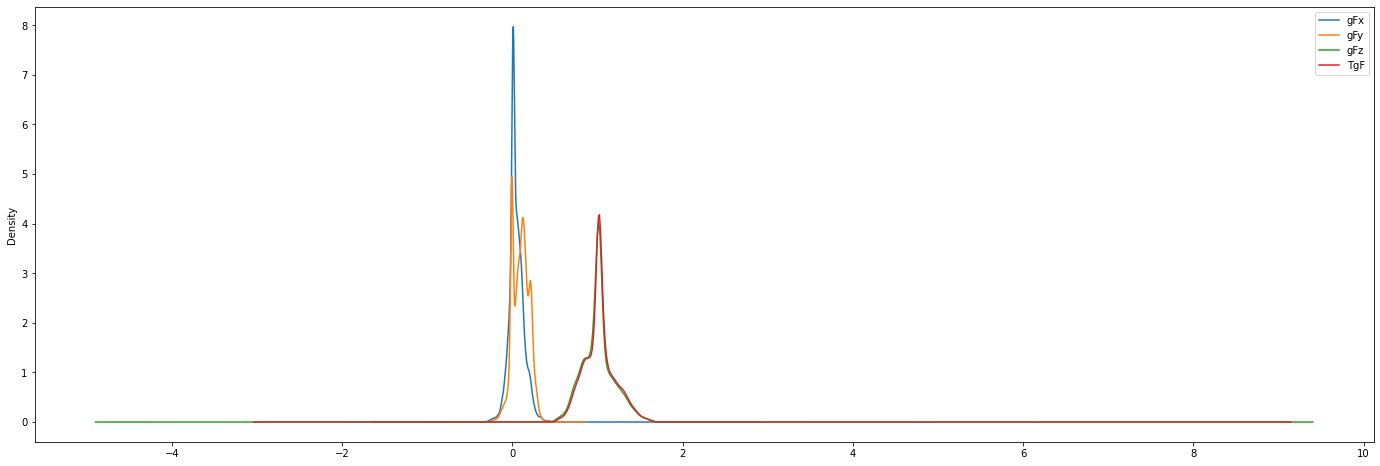

In [9]:
time_serie.plot(kind='kde')
#plt.xlim(-3, 3)
plt.show()

## Autocorrelation for a1 vibration signal
y(t+1) vs. y(t) values

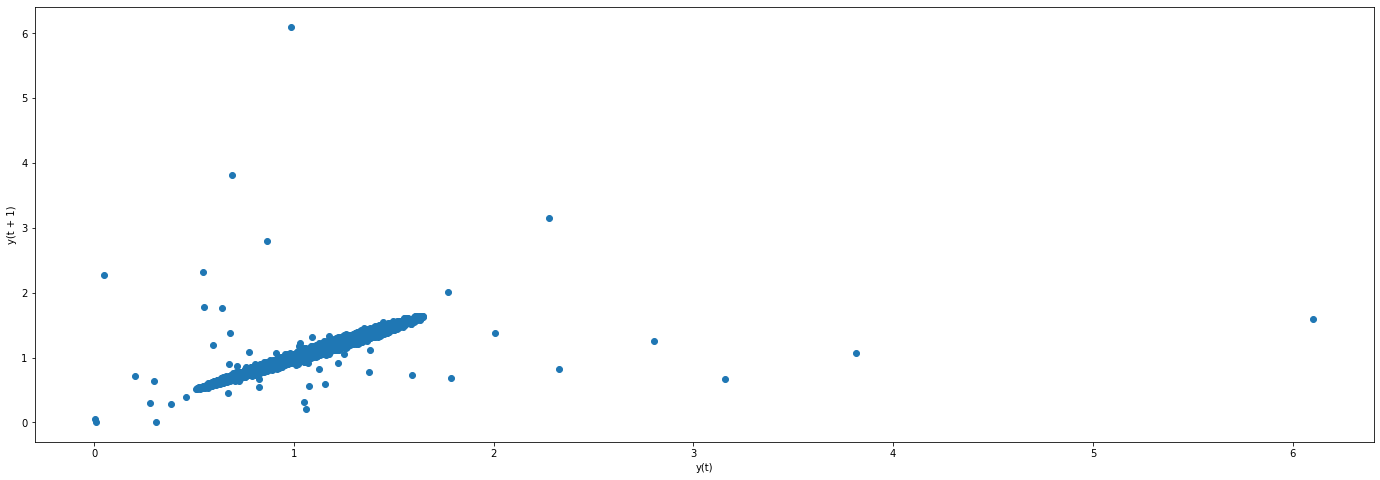

In [10]:
from pandas.plotting import lag_plot

lag_plot(time_serie['TgF'])
plt.show()

And as a function of the lag value: y(t+lag) vs. y(t) values

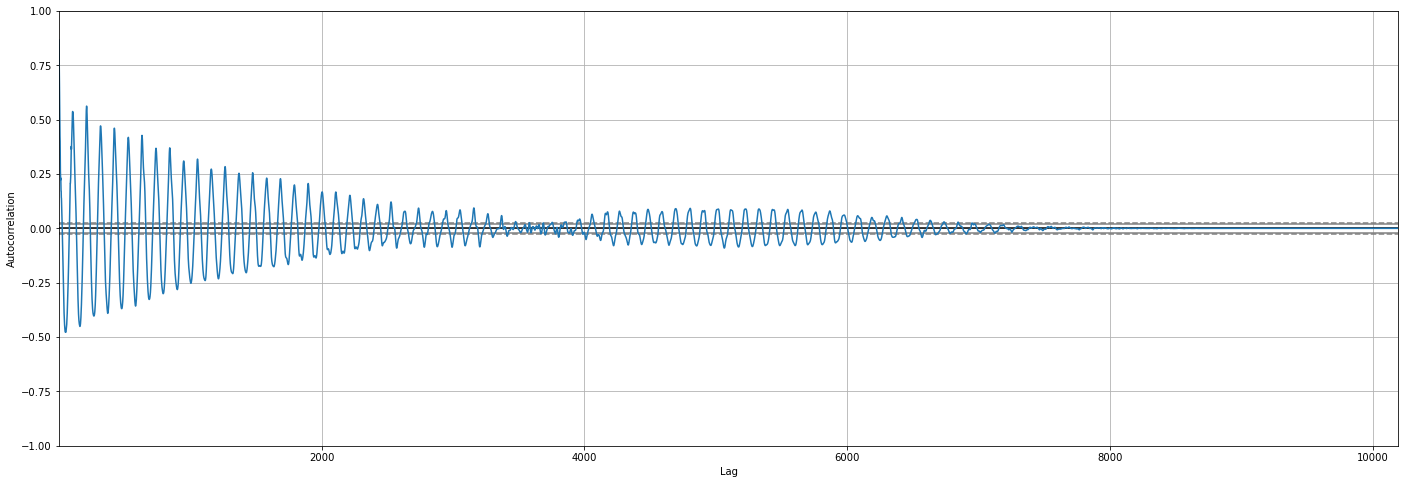

In [11]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(time_serie['TgF'])
plt.show()